In [1]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,ConfusionMatrixDisplay,classification_report, precision_recall_curve, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns
from yellowbrick.classifier import ConfusionMatrix
from pandas.plotting import scatter_matrix
from tensorflow import keras
from tensorflow.keras import layers

/kaggle/input/water-quality-and-potability/water_potability.csv


In [2]:
data = pd.read_csv('/kaggle/input/water-quality-and-potability/water_potability.csv')

In [3]:
data.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [5]:
data.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [6]:
features = data.columns.drop('Potability')

In [7]:
X = data[features]
y = data['Potability']

In [8]:
data.corr()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
ph,1.000000,0.082096,-0.089288,-0.034350,0.018203,0.018614,0.043503,0.003354,-0.039057,-0.003556
Hardness,0.082096,1.000000,-0.046899,-0.030054,-0.106923,-0.023915,0.003610,-0.013013,-0.014449,-0.013837
Solids,-0.089288,-0.046899,1.000000,-0.070148,-0.171804,0.013831,0.010242,-0.009143,0.019546,0.033743
Chloramines,-0.034350,-0.030054,-0.070148,1.000000,0.027244,-0.020486,-0.012653,0.017084,0.002363,0.023779
Sulfate,0.018203,-0.106923,-0.171804,0.027244,1.000000,-0.016121,0.030831,-0.030274,-0.011187,-0.023577
Conductivity,0.018614,-0.023915,0.013831,-0.020486,-0.016121,1.000000,0.020966,0.001285,0.005798,-0.008128
Organic_carbon,0.043503,0.003610,0.010242,-0.012653,0.030831,0.020966,1.000000,-0.013274,-0.027308,-0.030001
Trihalomethanes,0.003354,-0.013013,-0.009143,0.017084,-0.030274,0.001285,-0.013274,1.000000,-0.022145,0.007130
Turbidity,-0.039057,-0.014449,0.019546,0.002363,-0.011187,0.005798,-0.027308,-0.022145,1.000000,0.001581
Potability,-0.003556,-0.013837,0.033743,0.023779,-0.023577,-0.008128,-0.030001,0.007130,0.001581,1.000000


array([[<Axes: title={'center': 'ph'}>,
        <Axes: title={'center': 'Hardness'}>,
        <Axes: title={'center': 'Solids'}>],
       [<Axes: title={'center': 'Chloramines'}>,
        <Axes: title={'center': 'Sulfate'}>,
        <Axes: title={'center': 'Conductivity'}>],
       [<Axes: title={'center': 'Organic_carbon'}>,
        <Axes: title={'center': 'Trihalomethanes'}>,
        <Axes: title={'center': 'Turbidity'}>],
       [<Axes: title={'center': 'Potability'}>, <Axes: >, <Axes: >]],
      dtype=object)

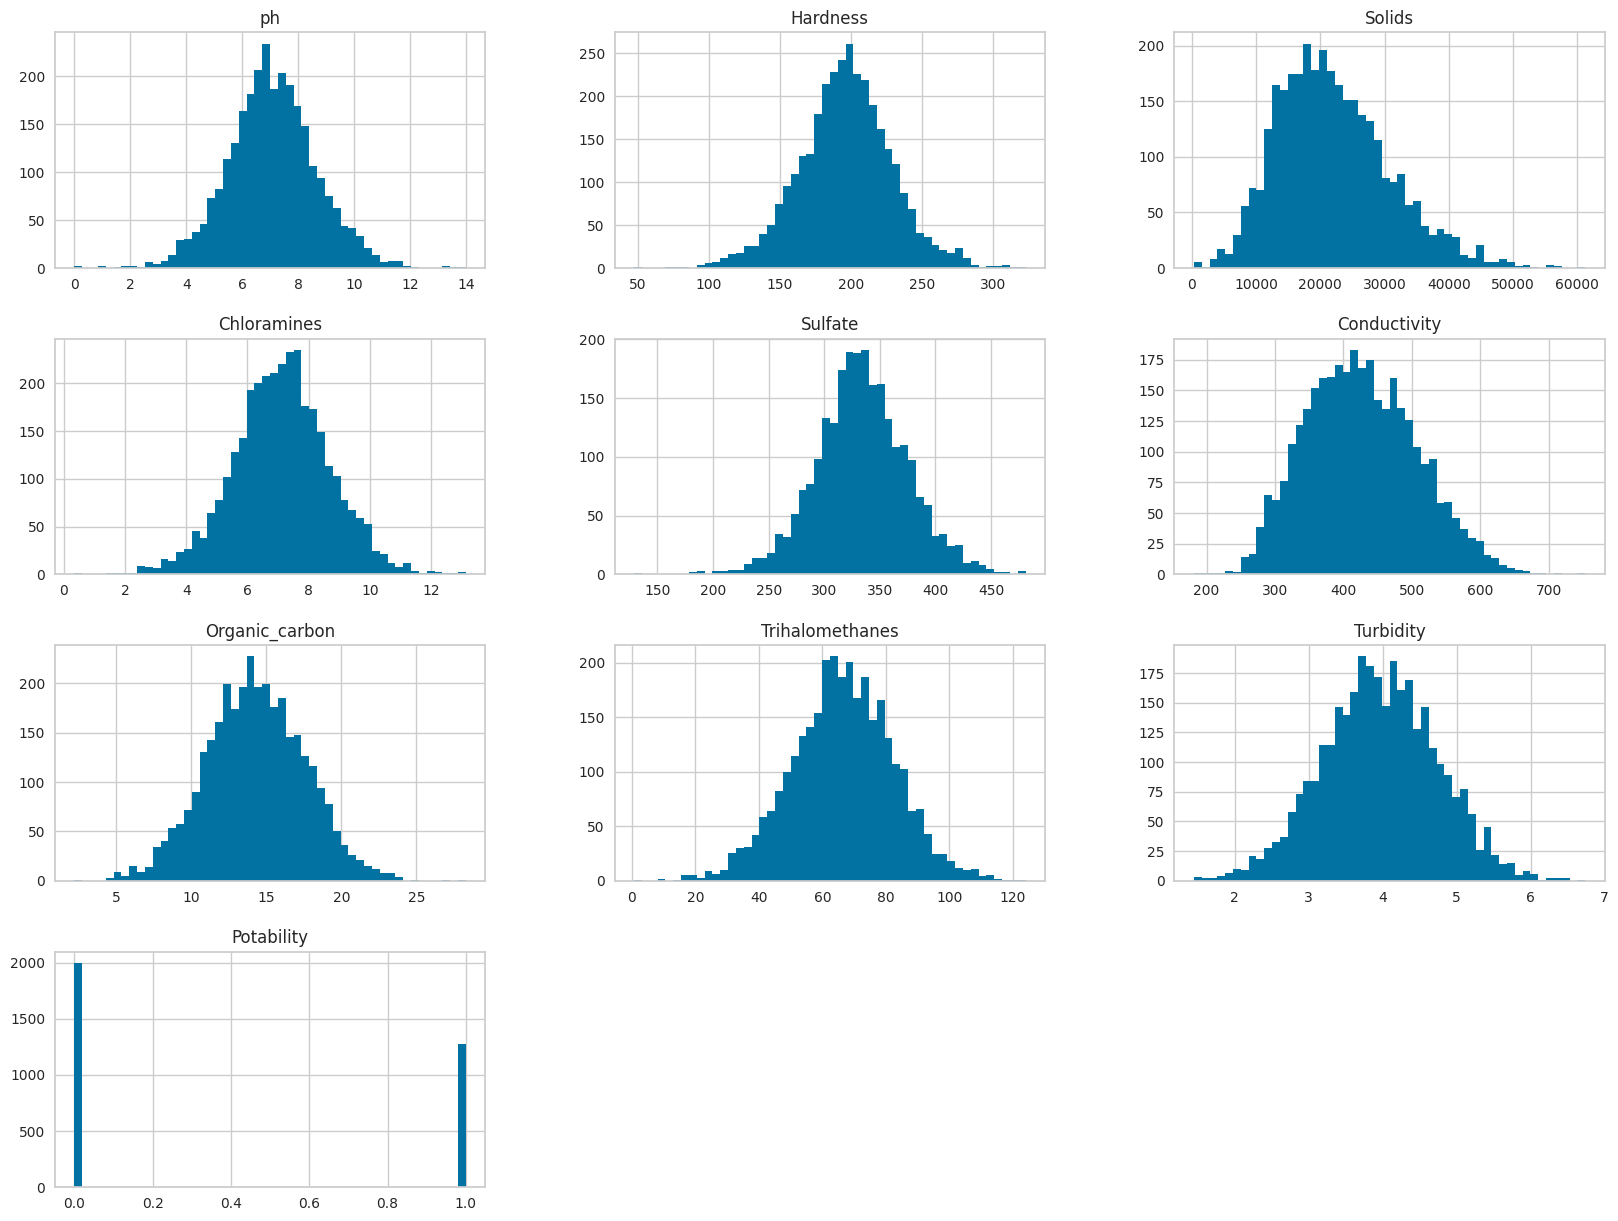

In [9]:
data.hist(bins=50, figsize=(20,15))

In [11]:
from collections import Counter
def detect_outliers(df, features):
  outliers_indicies = []

  for c in features:
    Q1 = np.percentile(df[c], 25)  # 1st quartile
    Q3 = np.percentile(df[c], 75)  # 3rd quartile
    IQR = Q3 - Q1
    outlier_step = IQR * 1.5
    outlier_list_col = df[(df[c] < Q1 - outlier_step) |
                          (df[c] > Q3 + outlier_step)].index  # detect quartiles indicies
    outliers_indicies.extend(outlier_list_col)

  outlier_indicies = Counter(outliers_indicies)
  multiple_outliers = list(i for i, v in outlier_indicies.items() if v > 1)

  return multiple_outliers

In [12]:
outliers = detect_outliers(data, features)
data.loc[outliers]

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
227,7.083779,112.820254,8580.245561,4.210284,234.852699,434.747715,23.399516,94.160307,3.887681,0
275,5.324942,280.089655,35344.658047,13.043806,180.206746,392.421496,10.504820,55.084668,4.427138,1
342,5.910252,282.739017,15244.846395,6.636551,363.384683,695.369528,13.138353,89.801011,3.660923,1
366,4.037288,291.461897,52318.917298,7.779459,NaN,401.204271,16.542921,87.814800,3.045049,1
405,NaN,286.201763,46931.884293,7.440024,262.526456,557.421879,14.471650,74.043860,4.120931,1
1536,6.336589,106.380113,15570.142322,6.851405,441.587654,380.433019,5.218233,48.735514,4.356594,1
1815,8.006373,116.725122,45041.149139,5.165292,NaN,367.688991,13.425165,87.381981,2.396505,0
1858,NaN,115.392979,46077.358485,5.289307,437.592300,422.017356,10.809632,53.617035,4.212511,0
1868,6.904537,110.865788,32981.258377,2.621268,368.387038,417.249395,12.118720,33.499381,5.058905,0
2012,9.175586,281.594235,47852.888871,8.330276,314.783761,422.318227,9.969136,64.070548,2.959685,1


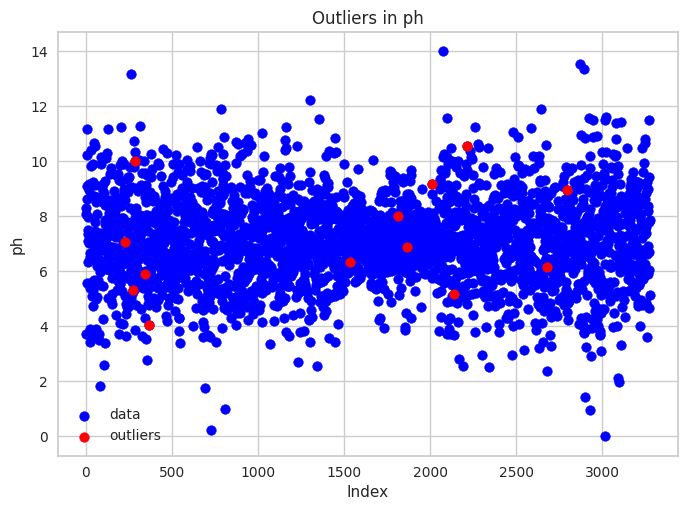

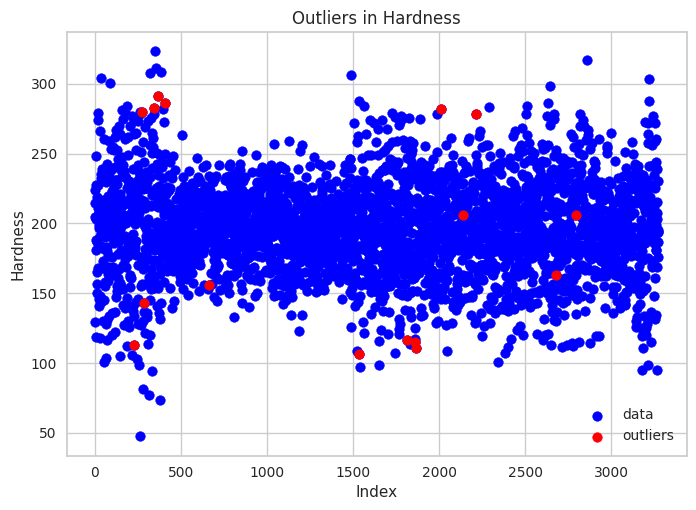

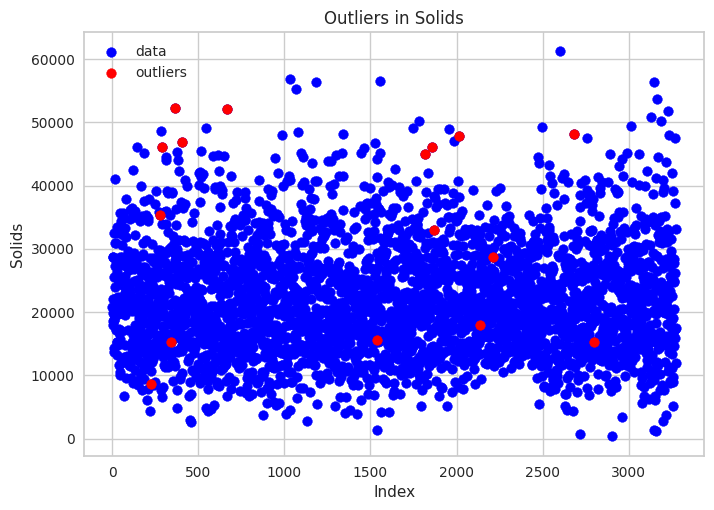

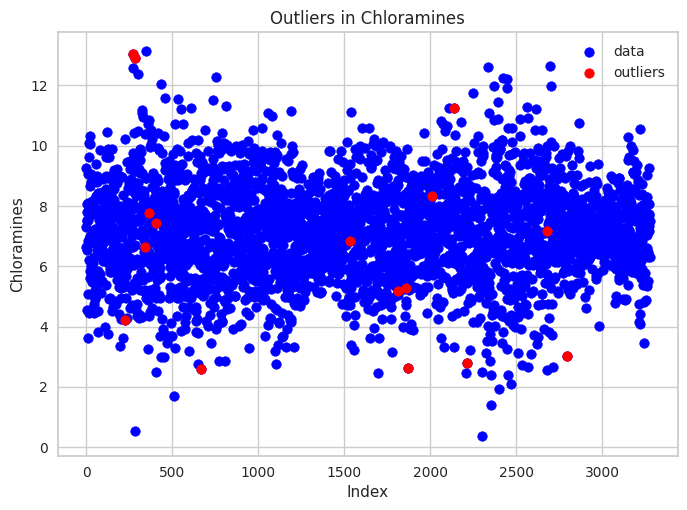

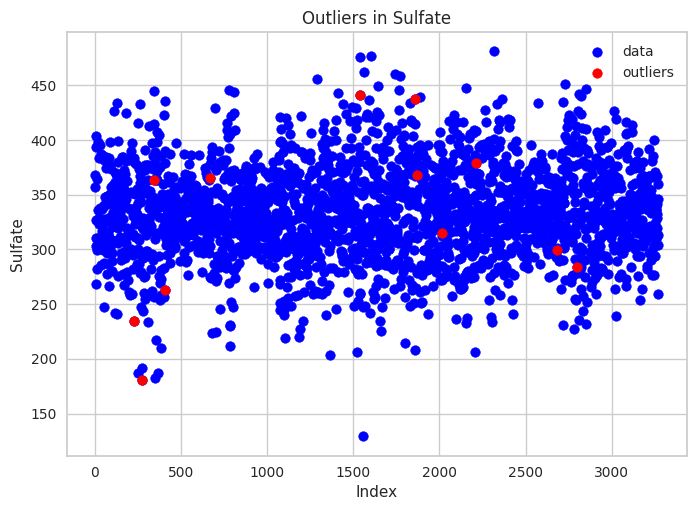

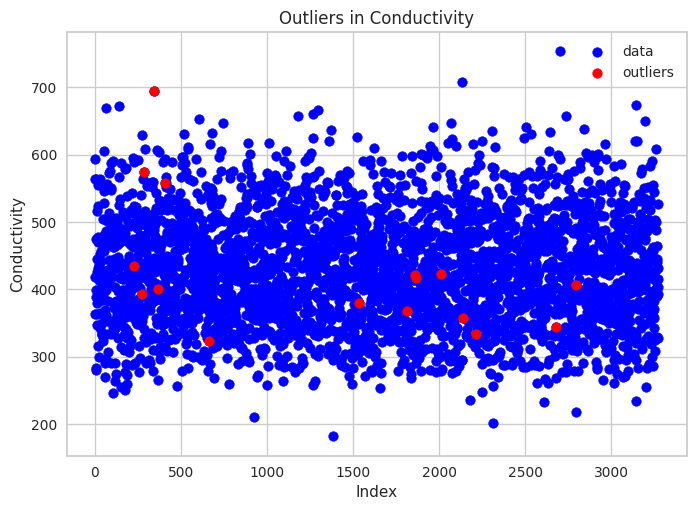

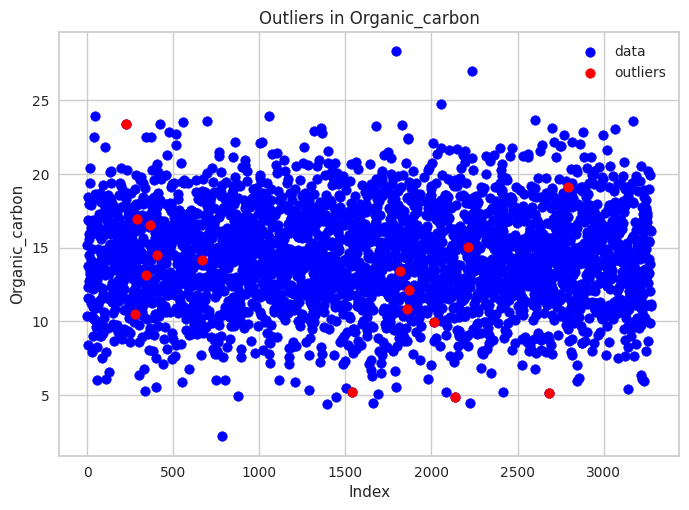

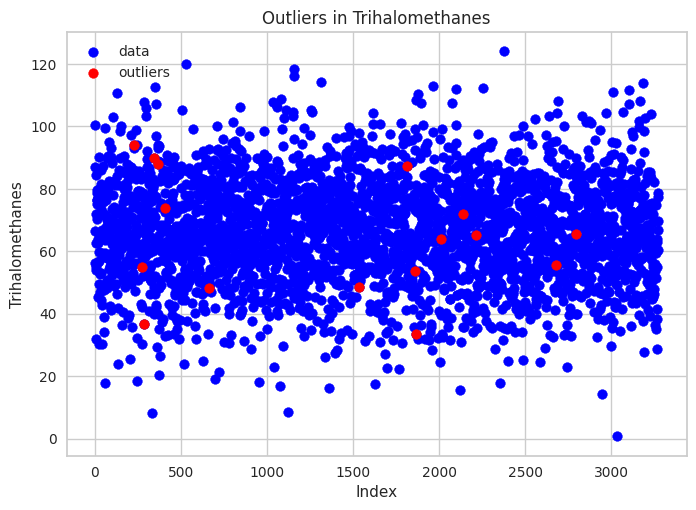

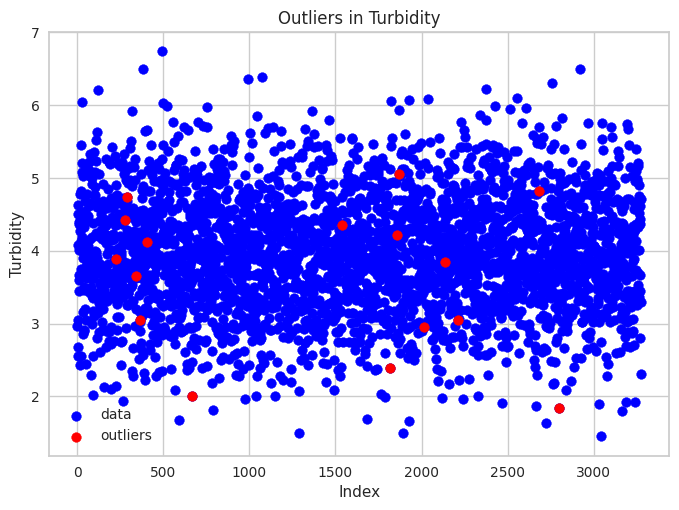

In [13]:
for feature in features:
  plt.figure()
  plt.scatter(data.index, data[feature], color = 'blue',
              label='data')
  plt.scatter(outliers, data.loc[outliers, feature],
              color='red', label='outliers')
  plt.xlabel('Index')
  plt.ylabel(feature)
  plt.title('Outliers in {}'.format(feature))
  plt.legend()
  plt.show()

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
#imputer = SimpleImputer(strategy="median")
#imputer.fit(data[features])

In [16]:
#X = imputer.transform(data[features])

In [17]:
num_pipeline = Pipeline([
('imputer', SimpleImputer(strategy="median")),
('std_scaler', StandardScaler()),
])

In [18]:
X_train_tr = num_pipeline.fit_transform(X_train)
X_test_tr = num_pipeline.fit_transform(X_test)

In [22]:
rf=RandomForestClassifier(criterion='entropy', max_features=10, min_samples_leaf=1, min_samples_split=2, n_estimators=400)
#parameters = {"max_features": [1,3,10],
              #"min_samples_split":[2,3,10],
              #"min_samples_leaf":[1,3,10],
              #"n_estimators":[100,300, 400, 500],
             # "criterion":["gini", "entropy"]}

Accuracy:0.6829268292682927
F1-Score:0.46666666666666673
Precision:0.6232876712328768
Recall:0.3729508196721312
              precision    recall  f1-score   support

           0       0.70      0.87      0.77       412
           1       0.62      0.37      0.47       244

    accuracy                           0.68       656
   macro avg       0.66      0.62      0.62       656
weighted avg       0.67      0.68      0.66       656



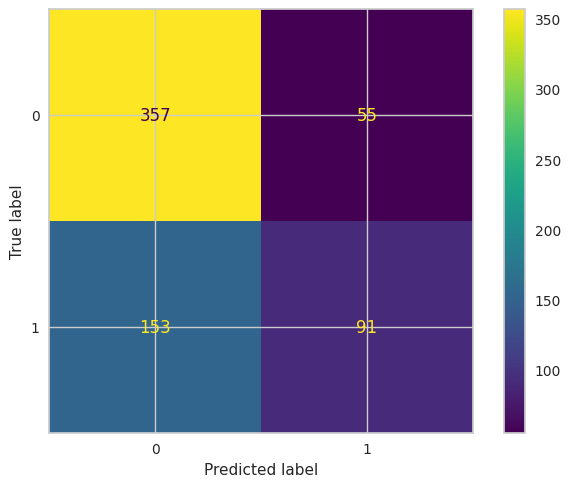

In [23]:
#grid_search = GridSearchCV(estimator=rf, cv=5, n_jobs=-1,verbose=1, scoring='f1')
#grid_search.fit(X_train_tr, y_train)
#print ('Best score: %0.3f' % grid_search.best_score_)
#print ('Best parameters set:')
#best_parameters = grid_search.best_estimator_.get_params()
#for param_name in sorted(parameters.keys()):
   # print ('\t%s: %r' % (param_name, best_parameters[param_name]))
rf.fit(X_train_tr, y_train)
y_pred = rf.predict(X_test_tr)
print(f"Accuracy:{accuracy_score(y_test, y_pred)}")
print(f"F1-Score:{f1_score(y_test, y_pred)}")
print(f"Precision:{precision_score(y_test, y_pred)}")
print(f"Recall:{recall_score(y_test, y_pred)}")
print (classification_report(y_test, y_pred))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()

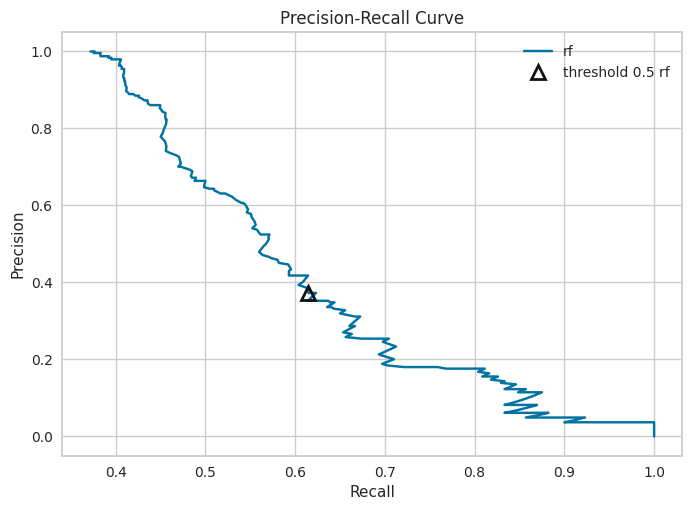

In [24]:
precision_rf, recall_rf, thresholds_rf = precision_recall_curve(y_test, rf.predict_proba(X_test_tr)[:, 1])
plt.plot(precision_rf, recall_rf, label="rf")
close_default_rf = np.argmin(np.abs(thresholds_rf - 0.5))
plt.plot(precision_rf[close_default_rf], recall_rf[close_default_rf], '^', c='k', markersize=10, label="threshold 0.5 rf", fillstyle="none", mew=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="best")

Text(0.5, 1.0, 'ROC Curve')

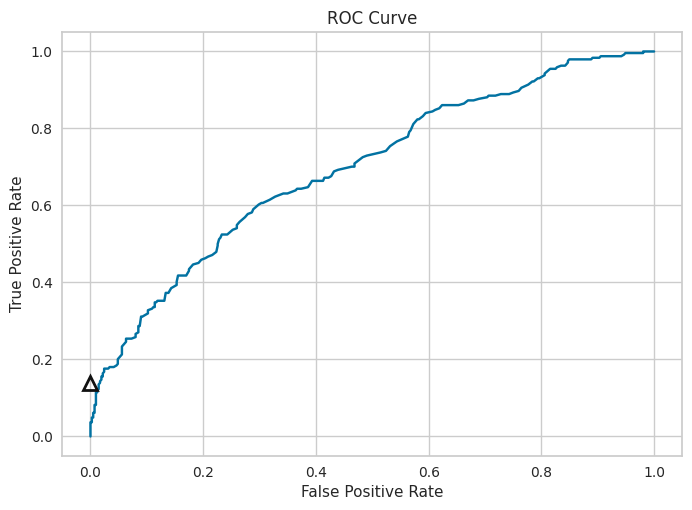

In [25]:
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, rf.predict_proba(X_test_tr)[:, 1])
plt.plot(fpr_rf, tpr_rf, label="ROC Curve RF")
close_default_rf = np.argmin(np.abs(thresholds_rf - 0.5))
plt.plot(fpr_rf[close_default_rf], '^', markersize=10, label="threshold 0.5 RF", fillstyle="none", c='k', mew=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')

Text(0.5, 1.0, 'F1-score Curve')

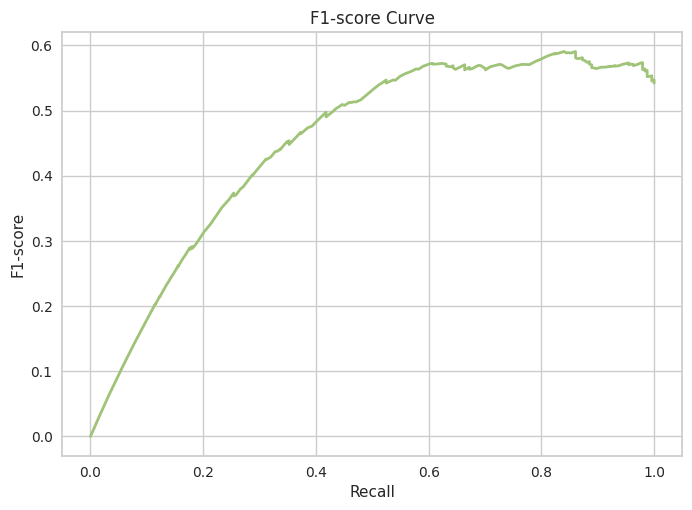

In [26]:
f1_score = [2 * (p * r) / (p + r) for p, r in zip(precision_rf, recall_rf)]
plt.plot(recall_rf, f1_score, color='g', lw=2, label='F1-score')
plt.xlabel('Recall')
plt.ylabel('F1-score')
plt.title('F1-score Curve')